### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

https://www.kaggle.com/uciml/pima-indians-diabetes-database

### Load and Explore Data

In [2]:
diabetes_data = pd.read_csv('datasets/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diagnosis
0,10,115,0,0,0,35.3,0.134,29,0
1,2,197,70,45,543,30.5,0.158,53,1
2,4,110,92,0,0,37.6,0.191,30,0
3,10,168,74,0,0,38.0,0.537,34,1
4,10,139,80,0,0,27.1,1.441,57,0


In [3]:
diabetes_data.shape

(533, 9)

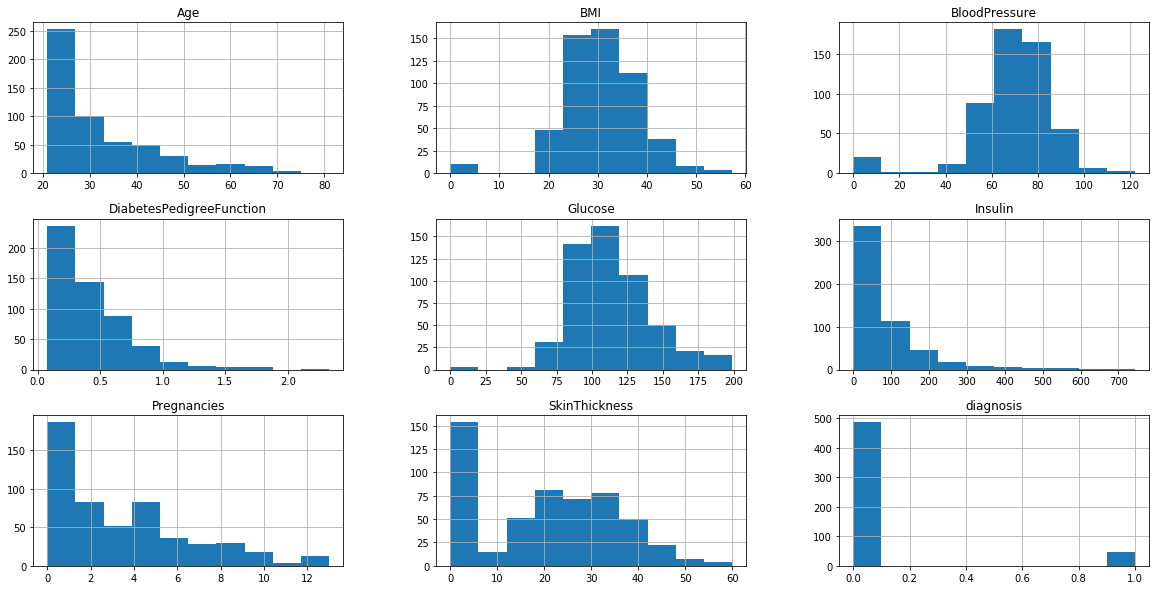

In [4]:
diabetes_data.hist(figsize=(20, 10));

In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diagnosis
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000
mean,3.454034,113.285178,68.510319,19.544090,72.424015,30.618762,0.438325,31.727955,0.086304
std,3.137250,28.490160,18.313847,15.112623,106.392875,7.901289,0.302712,11.718948,0.281076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,95.000000,62.000000,0.000000,0.000000,25.600000,0.235000,23.000000,0.000000
50%,2.000000,109.000000,70.000000,21.000000,37.000000,30.400000,0.338000,27.000000,0.000000
75%,5.000000,128.000000,78.000000,31.000000,106.000000,35.500000,0.580000,37.000000,0.000000
max,13.000000,199.000000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,1.000000


### Check for imbalance

In [6]:
diagnosis_count = diabetes_data.diagnosis.value_counts()

Class 0: 487
Class 1: 46
Proportion: 10.59 : 1


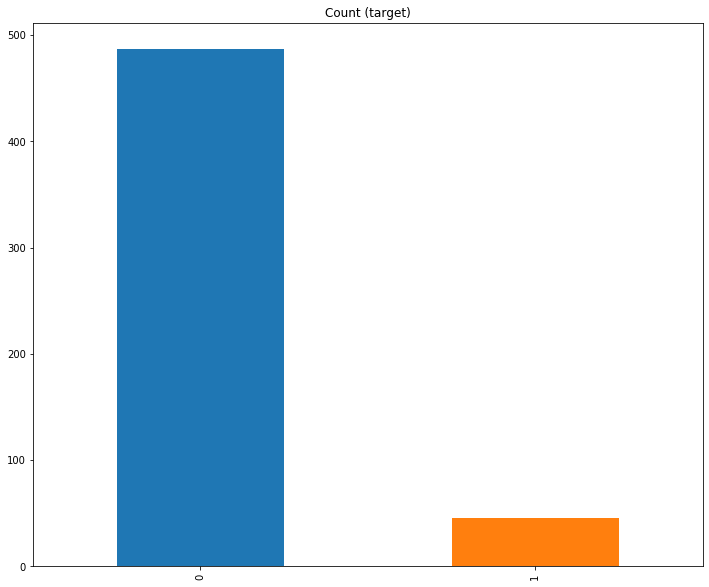

In [7]:
print('Class 0:', diagnosis_count[0])
print('Class 1:', diagnosis_count[1])
print('Proportion:', round(diagnosis_count[0] / diagnosis_count[1], 2), ': 1')

diagnosis_count.plot(kind='bar', title='Count (target)', figsize = (12, 10));

### Separate input features and target

In [8]:
y = diabetes_data.diagnosis
X = diabetes_data.drop('diagnosis', axis=1)

### Setting up testing and training sets

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 27)

In [10]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear')

In [11]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Checking accuracy

In [12]:
y_pred = logistic_model.predict(X_test)

In [13]:
pd.crosstab (y_pred, y_test)

diagnosis,0,1
row_0,,
0,123,10
1,1,0


In [14]:
from sklearn import metrics

In [15]:
metrics.accuracy_score(y_test, y_pred)

0.917910447761194

In [16]:
metrics.precision_score(y_test, y_pred)

0.0

In [17]:
metrics.recall_score(y_test, y_pred)

0.0

## Balancing data using `Sklear.utils.resample`
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler

In [18]:
X = pd.concat([X_train, y_train], axis=1)

In [19]:
X = X.reset_index(drop=True)

#### Separate minority and majority classes

In [20]:
non_diabetic = diabetes_data[diabetes_data.diagnosis==0]

diabetic = diabetes_data[diabetes_data.diagnosis==1]

## Oversampling
* Oversampling the minority class

In [36]:
from sklearn.utils import resample 

* replace: sample with replacement
* n_samples: number of samples to match
* random_state: For reproducible results

In [23]:
over_sampled = resample(diabetic,
                        replace = True, 
                        n_samples = len(non_diabetic), 
                        random_state = 27) 

#### Combine majority and upsampled minority

In [24]:
over_sampled = pd.concat([non_diabetic, over_sampled])

over_sampled = over_sampled.reset_index(drop=True)

In [25]:
over_sampled.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diagnosis
855,10,115,0,0,0,0.0,0.261,30,1
157,2,128,64,42,0,40.0,1.101,24,0
814,4,171,72,0,0,43.6,0.479,26,1
375,6,123,72,45,230,33.6,0.733,34,0
231,1,100,66,29,196,32.0,0.444,42,0


#### New class counts

In [26]:
diagnosis_count = over_sampled.diagnosis.value_counts()

Class 0: 487
Class 1: 487
Proportion: 1.0 : 1


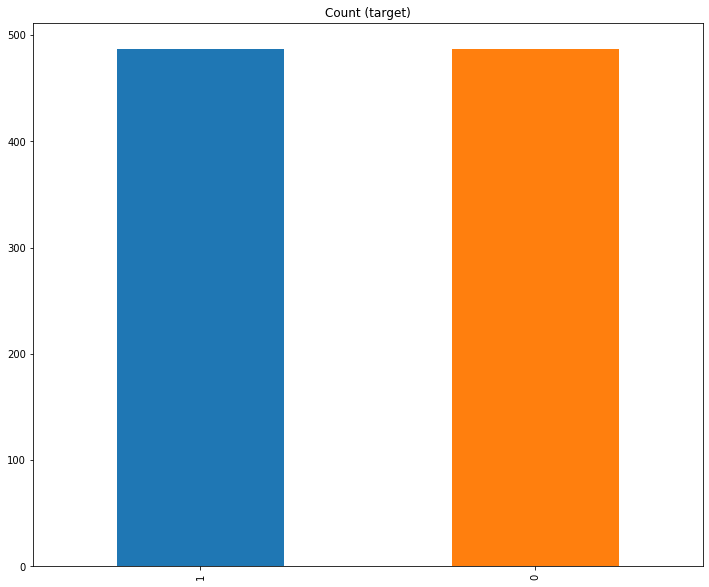

In [27]:
print('Class 0:', diagnosis_count[0])
print('Class 1:', diagnosis_count[1])
print('Proportion:', round(diagnosis_count[0] / diagnosis_count[1], 2), ': 1')

diagnosis_count.plot(kind='bar', title='Count (target)', figsize = (12, 10));

In [28]:
y_train = over_sampled.diagnosis

X_train = over_sampled.drop('diagnosis', axis=1)

In [29]:
logistic_model = LogisticRegression(solver='liblinear')

In [30]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Checking accuracy

In [31]:
y_pred = logistic_model.predict(X_test)

In [32]:
pd.crosstab (y_pred, y_test)

diagnosis,0,1
row_0,,
0,101,1
1,23,9


In [33]:
metrics.accuracy_score(y_test, y_pred)

0.8208955223880597

In [34]:
metrics.precision_score(y_test, y_pred)

0.28125

In [35]:
metrics.recall_score(y_test, y_pred)

0.9

## Undersampling
* Unsampling the majority class

In [50]:
under_sampled = resample(non_diabetic,
                         replace=True, 
                         n_samples=len(diabetic), 
                         random_state=27) # reproducible results

In [51]:
under_sampled = pd.concat([diabetic, under_sampled])
under_sampled = under_sampled.reset_index(drop=True)

Class 0: 487
Class 1: 487
Proportion: 1.0 : 1


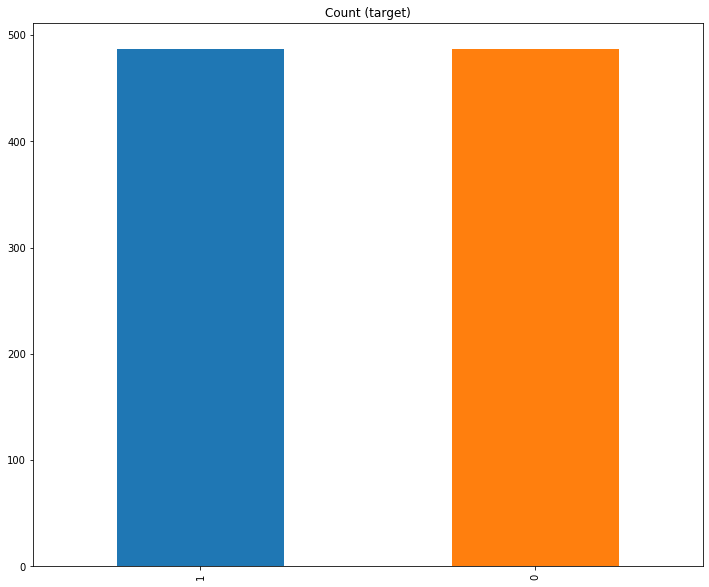

In [52]:
print('Class 0:', diagnosis_count[0])
print('Class 1:', diagnosis_count[1])
print('Proportion:', round(diagnosis_count[0] / diagnosis_count[1], 2), ': 1')

diagnosis_count.plot(kind='bar', title='Count (target)', figsize= (12, 10));

In [42]:
y_train = under_sampled.diagnosis

X_train = under_sampled.drop('diagnosis', axis=1)

In [43]:
logistic_model = LogisticRegression(solver='liblinear')

In [44]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Checking accuracy

In [45]:
y_pred = logistic_model.predict(X_test)

In [46]:
pd.crosstab (y_pred, y_test)

diagnosis,0,1
row_0,,
0,93,2
1,31,8


In [47]:
metrics.accuracy_score(y_test, y_pred)

0.753731343283582

In [48]:
metrics.precision_score(y_test, y_pred)

0.20512820512820512

In [49]:
metrics.recall_score(y_test, y_pred)

0.8